In [55]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [56]:
car_set = pd.read_csv("car_data.csv")

In [57]:
car_set.head(10)

,Unnamed: 0,Model,Year,Status,Mileage,Price,MSRP
0,0,2022 Acura TLX A-Spec,2022,New,Not available,"$49,445","MSRP $49,445"
1,1,2023 Acura RDX A-Spec,2023,New,Not available,"$50,895",Not specified
2,2,2023 Acura TLX Type S,2023,New,Not available,"$57,745",Not specified
3,3,2023 Acura TLX Type S,2023,New,Not available,"$57,545",Not specified
4,4,2019 Acura MDX Sport Hybrid 3.0L w/Technology ...,2019,Used,"32,675 mi.","$40,990",$600 price drop
5,5,2023 Acura TLX A-Spec,2023,New,Not available,"$50,195","MSRP $50,195"
6,6,2023 Acura TLX A-Spec,2023,New,Not available,"$50,195","MSRP $50,195"
7,7,2023 Acura TLX Type S,2023,New,Not available,"$57,745",Not specified
8,8,2023 Acura TLX A-Spec,2023,New,Not available,"$47,995",Not specified
9,9,2022 Acura TLX A-Spec,2022,New,Not available,"$49,545",Not specified


In [58]:
car_set.drop(columns=['Unnamed: 0'], inplace=True)
car_set.head()

,Model,Year,Status,Mileage,Price,MSRP
0,2022 Acura TLX A-Spec,2022,New,Not available,"$49,445","MSRP $49,445"
1,2023 Acura RDX A-Spec,2023,New,Not available,"$50,895",Not specified
2,2023 Acura TLX Type S,2023,New,Not available,"$57,745",Not specified
3,2023 Acura TLX Type S,2023,New,Not available,"$57,545",Not specified
4,2019 Acura MDX Sport Hybrid 3.0L w/Technology ...,2019,Used,"32,675 mi.","$40,990",$600 price drop


In [59]:
null_count = car_set.isnull().sum()
print(null_count)

Model      0
Year       0
Status     0
Mileage    0
Price      0
MSRP       0
dtype: int64


In [60]:
car_set.shape

(115762, 6)

In [7]:
car_set.describe()

,Year
count,115762.000000
mean,2019.706907
std,4.525427
min,1949.000000
25%,2018.000000
50%,2021.000000
75%,2023.000000
max,2023.000000


In [8]:
years_count = car_set['Year'].value_counts()
print(years_count)

Year
2023    34989
2022    20733
2020    10143
2021     9809
2019     9779
        ...  
1958        2
1962        2
1953        1
1949        1
1966        1
Name: count, Length: 70, dtype: int64


In [61]:
car_set = car_set[car_set['Year'] >= 2000]

In [62]:
car_set.shape

(115172, 6)

In [63]:
car_set.head()

,Model,Year,Status,Mileage,Price,MSRP
0,2022 Acura TLX A-Spec,2022,New,Not available,"$49,445","MSRP $49,445"
1,2023 Acura RDX A-Spec,2023,New,Not available,"$50,895",Not specified
2,2023 Acura TLX Type S,2023,New,Not available,"$57,745",Not specified
3,2023 Acura TLX Type S,2023,New,Not available,"$57,545",Not specified
4,2019 Acura MDX Sport Hybrid 3.0L w/Technology ...,2019,Used,"32,675 mi.","$40,990",$600 price drop


In [64]:
final_set = pd.read_csv('final_car_set.csv')

In [65]:
final_set.head(8)

,Model,Year,Status,Mileage,Price,MSRP,Car_Brand
0,2022 Acura TLX A-Spec,2022,New,Not available,"$49,445","MSRP $49,445",Acura
1,2023 Acura RDX A-Spec,2023,New,Not available,"$50,895",Not specified,Acura
2,2023 Acura TLX Type S,2023,New,Not available,"$57,745",Not specified,Acura
3,2023 Acura TLX Type S,2023,New,Not available,"$57,545",Not specified,Acura
4,2019 Acura MDX Sport Hybrid 3.0L w/Technology ...,2019,Used,"32,675 mi.","$40,990",$600 price drop,Acura
5,2023 Acura TLX A-Spec,2023,New,Not available,"$50,195","MSRP $50,195",Acura
6,2023 Acura TLX A-Spec,2023,New,Not available,"$50,195","MSRP $50,195",Acura
7,2023 Acura TLX Type S,2023,New,Not available,"$57,745",Not specified,Acura


In [66]:
def preprocess_miles(miles_str):
    try:
        miles_numeric = pd.to_numeric(miles_str.replace(' mi.', '').replace(',', ''))
        return miles_numeric
    except ValueError:
        return 'not available'

final_set['Mileage'] = final_set['Mileage'].apply(preprocess_miles)

In [67]:
final_set.head(8)

,Model,Year,Status,Mileage,Price,MSRP,Car_Brand
0,2022 Acura TLX A-Spec,2022,New,not available,"$49,445","MSRP $49,445",Acura
1,2023 Acura RDX A-Spec,2023,New,not available,"$50,895",Not specified,Acura
2,2023 Acura TLX Type S,2023,New,not available,"$57,745",Not specified,Acura
3,2023 Acura TLX Type S,2023,New,not available,"$57,545",Not specified,Acura
4,2019 Acura MDX Sport Hybrid 3.0L w/Technology ...,2019,Used,32675,"$40,990",$600 price drop,Acura
5,2023 Acura TLX A-Spec,2023,New,not available,"$50,195","MSRP $50,195",Acura
6,2023 Acura TLX A-Spec,2023,New,not available,"$50,195","MSRP $50,195",Acura
7,2023 Acura TLX Type S,2023,New,not available,"$57,745",Not specified,Acura


In [68]:
final_set.to_csv('completed_set.csv', index=False)

In [69]:
completed_set = pd.read_csv('completed_set.csv')
completed_set.head()

,Model,Year,Status,Mileage,Price,MSRP,Car_Brand
0,2022 Acura TLX A-Spec,2022,New,not available,"$49,445","MSRP $49,445",Acura
1,2023 Acura RDX A-Spec,2023,New,not available,"$50,895",Not specified,Acura
2,2023 Acura TLX Type S,2023,New,not available,"$57,745",Not specified,Acura
3,2023 Acura TLX Type S,2023,New,not available,"$57,545",Not specified,Acura
4,2019 Acura MDX Sport Hybrid 3.0L w/Technology ...,2019,Used,32675,"$40,990",$600 price drop,Acura


In [70]:
unique_prices = completed_set['Price'].unique()

print("Unique values in the Price column:")
print(unique_prices)

Unique values in the Price column:
['$49,445' '$50,895' '$57,745' ... '$44,193' '$11,980' '$47,346']


In [71]:
price_column_type = completed_set['Price'].dtype

print("Type of 'Price' column:", price_column_type)

Type of 'Price' column: object


In [72]:
def preprocess_price(price):
    # Check if the input is already numeric
    if pd.isna(price):
        return pd.NA
    elif isinstance(price, (int, float)):
        return price
    else:
        try:
            # Remove dollar signs and commas, then convert to numeric
            price_numeric = pd.to_numeric(str(price).replace('$', '').replace(',', ''), errors='coerce')
            return price_numeric
        except ValueError:
            return pd.NA  # Return missing value indicator if conversion fails

completed_set['Price'] = completed_set['Price'].apply(preprocess_price)

In [21]:
completed_set.head()

,Model,Year,Status,Mileage,Price,MSRP,Car_Brand
0,2022 Acura TLX A-Spec,2022,New,not available,49445.0,"MSRP $49,445",Acura
1,2023 Acura RDX A-Spec,2023,New,not available,50895.0,Not specified,Acura
2,2023 Acura TLX Type S,2023,New,not available,57745.0,Not specified,Acura
3,2023 Acura TLX Type S,2023,New,not available,57545.0,Not specified,Acura
4,2019 Acura MDX Sport Hybrid 3.0L w/Technology ...,2019,Used,32675,40990.0,$600 price drop,Acura


In [73]:
unique_years = completed_set[completed_set['Status'] == 'Used']['Year'].unique()
print(unique_years)

[2019 2023 2016 2020 2008 2014 2015 2018 2021 2017 2022 2011 2013 2012
 2006 2007 2009 2010 2003 2004 2002 2005 2001 2000]


In [74]:
brand_counts = completed_set.groupby(['Car_Brand', 'Status']).size().reset_index(name='Count')

brand_status_counts = brand_counts.pivot(index='Car_Brand', columns='Status', values='Count')

brand_status_counts['Total'] = brand_status_counts.sum(axis=1)

top_brands = brand_status_counts.sort_values(by='Total', ascending=False).head(4)

print("Top 3 Brands with Counts of Used and New Cars:")
print(top_brands)

Top 3 Brands with Counts of Used and New Cars:
Status      Acura Certified  BMW Certified  Chevrolet Certified  \
Car_Brand                                                         
Mercedes                NaN            NaN                  NaN   
Volkswagen              NaN            NaN                  NaN   
Lexus                   NaN            NaN                  NaN   
Chevrolet               NaN            NaN                211.0   

Status      Dodge Certified  Ford Certified  INFINITI Certified      New  \
Car_Brand                                                                  
Mercedes                NaN             NaN                 NaN  10000.0   
Volkswagen              NaN             NaN                 NaN   3409.0   
Lexus                   NaN             NaN                 NaN   2270.0   
Chevrolet               NaN             NaN                 NaN   6959.0   

Status      Porsche Certified  Toyota Certified    Used  Volkswagen Certified  \
Car_Brand   

In [75]:
mercedes_used_df = completed_set[(completed_set['Car_Brand'] == 'Mercedes') & (completed_set['Status'] == 'Used')]

mercedes_used_df.head(15)

,Model,Year,Status,Mileage,Price,MSRP,Car_Brand
70496,2022 Mercedes-Benz Sprinter 2500 144 WB,2022,Used,310,159170.0,"$10,285 price drop",Mercedes
70608,2022 Mercedes-Benz Sprinter 2500 144 WB,2022,Used,310,159170.0,"$10,285 price drop",Mercedes
70719,2022 Mercedes-Benz Sprinter 2500 144 WB,2022,Used,310,159170.0,"$10,285 price drop",Mercedes
70804,2022 Mercedes-Benz Sprinter 2500 144 WB,2022,Used,310,159170.0,"$10,285 price drop",Mercedes
70911,2022 Mercedes-Benz Sprinter 2500 144 WB,2022,Used,310,159170.0,"$10,285 price drop",Mercedes
71012,2022 Mercedes-Benz Sprinter 2500 144 WB,2022,Used,310,159170.0,"$10,285 price drop",Mercedes
71102,2022 Mercedes-Benz Sprinter 2500 144 WB,2022,Used,310,159170.0,"$10,285 price drop",Mercedes
71214,2022 Mercedes-Benz Sprinter 2500 144 WB,2022,Used,310,159170.0,"$10,285 price drop",Mercedes
71318,2022 Mercedes-Benz Sprinter 2500 144 WB,2022,Used,310,159170.0,"$10,285 price drop",Mercedes
71426,2022 Mercedes-Benz Sprinter 2500 144 WB,2022,Used,310,159170.0,"$10,285 price drop",Mercedes


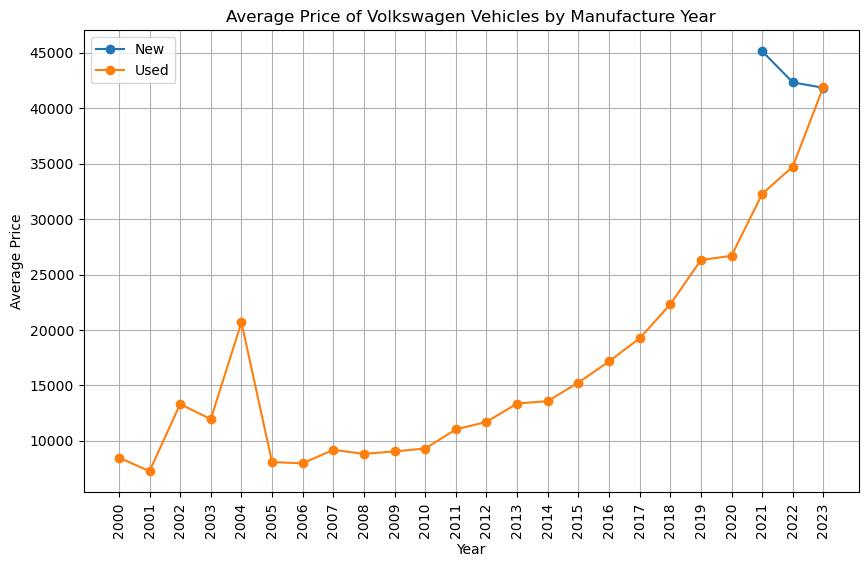

In [76]:
volkswagen_df = completed_set[completed_set['Car_Brand'] == 'Volkswagen']

average_price_per_year = volkswagen_df.groupby(['Year', 'Status'])['Price'].mean().unstack()

plt.figure(figsize=(10, 6))

plt.plot(average_price_per_year.index, average_price_per_year['New'], marker='o', linestyle='-', label='New')

plt.plot(average_price_per_year.index, average_price_per_year['Used'], marker='o', linestyle='-', label='Used')

plt.title('Average Price of Volkswagen Vehicles by Manufacture Year')
plt.xlabel('Year')
plt.xticks(range(average_price_per_year.index.min(), average_price_per_year.index.max() + 1), rotation='vertical')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()

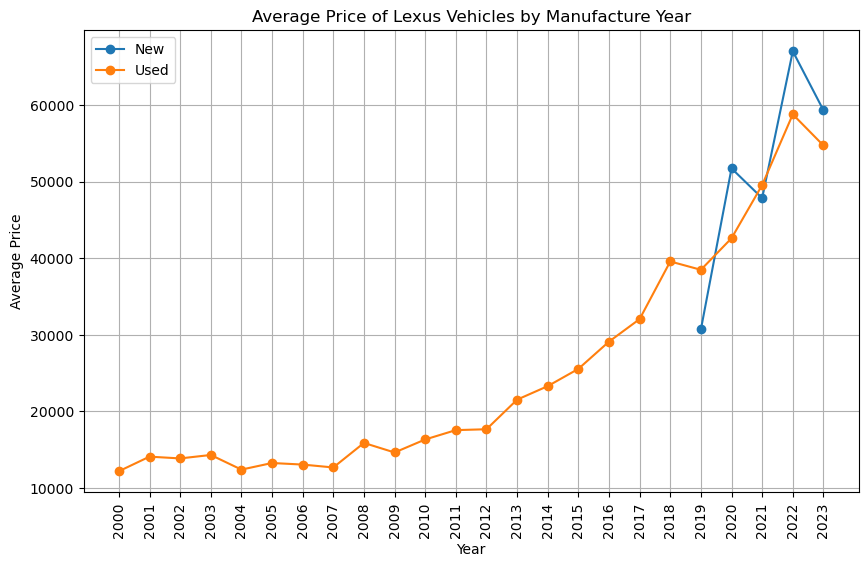

In [77]:
lexus_df = completed_set[completed_set['Car_Brand'] == 'Lexus']

average_price_per_year = lexus_df.groupby(['Year', 'Status'])['Price'].mean().unstack()

plt.figure(figsize=(10, 6))

plt.plot(average_price_per_year.index, average_price_per_year['New'], marker='o', linestyle='-', label='New')

plt.plot(average_price_per_year.index, average_price_per_year['Used'], marker='o', linestyle='-', label='Used')

plt.title('Average Price of Lexus Vehicles by Manufacture Year')
plt.xlabel('Year')
plt.xticks(range(average_price_per_year.index.min(), average_price_per_year.index.max() + 1), rotation='vertical')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()

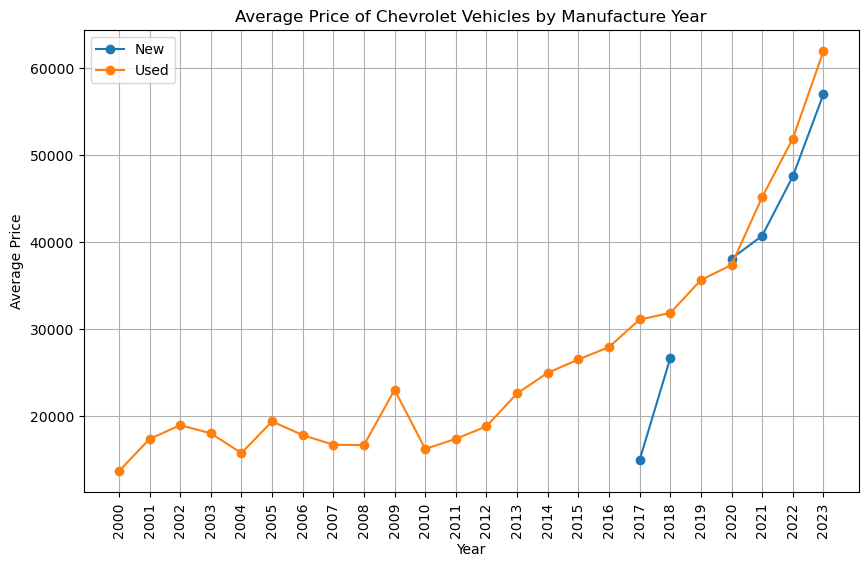

In [78]:
chevrolet_df = completed_set[completed_set['Car_Brand'] == 'Chevrolet']

average_price_per_year = chevrolet_df.groupby(['Year', 'Status'])['Price'].mean().unstack()

plt.figure(figsize=(10, 6))

plt.plot(average_price_per_year.index, average_price_per_year['New'], marker='o', linestyle='-', label='New')

plt.plot(average_price_per_year.index, average_price_per_year['Used'], marker='o', linestyle='-', label='Used')

plt.title('Average Price of Chevrolet Vehicles by Manufacture Year')
plt.xlabel('Year')
plt.xticks(range(average_price_per_year.index.min(), average_price_per_year.index.max() + 1), rotation='vertical')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()

In [79]:
unique_models_volkswagen = completed_set[completed_set['Car_Brand'] == 'Volkswagen']['Model'].unique()
unique_models_lexus = completed_set[completed_set['Car_Brand'] == 'Lexus']['Model'].unique()
unique_models_chevrolet = completed_set[completed_set['Car_Brand'] == 'Chevrolet']['Model'].unique()

In [80]:
print(unique_models_volkswagen)

['2023 Volkswagen Tiguan 2.0T SE'
 '2023 Volkswagen Tiguan 2.0T SE R-Line Black'
 '2023 Volkswagen Arteon 2.0T SEL R-Line' '2023 Volkswagen Taos 1.5T SE'
 '2022 Volkswagen ID.4 Pro' '2023 Volkswagen ID.4 Pro S'
 '2023 Volkswagen Atlas Cross Sport 3.6L V6 SE w/Technology'
 '2022 Volkswagen ID.4 Pro S'
 '2022 Volkswagen Tiguan 2.0T SE R-Line Black'
 '2023 Volkswagen Atlas 3.6L SEL' '2022 Volkswagen Tiguan 2.0T SE'
 '2022 Volkswagen Arteon 2.0T SEL R-Line'
 '2023 Volkswagen Atlas 3.6L SE w/Technology'
 '2023 Volkswagen Atlas 3.6 V6 SEL R-Line Black'
 '2023 Volkswagen Arteon 2.0T SEL Premium R-Line'
 '2022 Volkswagen Taos 1.5T SE'
 '2023 Volkswagen Atlas 3.6L SEL Premium R-Line'
 '2023 Volkswagen Tiguan 2.0T SEL R-Line Black'
 '2023 Volkswagen Atlas Cross Sport 3.6L V6 SEL'
 '2023 Volkswagen Tiguan 2.0T SEL R-Line'
 '2023 Volkswagen Golf GTI 2.0T SE' '2023 Volkswagen Jetta 1.5T SE'
 '2023 Volkswagen Jetta 1.4T S'
 '2023 Volkswagen Arteon 2.0T SEL R-Line 4MOTION'
 '2021 Volkswagen ID.4 Pro'

In [81]:
print(unique_models_lexus)

['2019 Lexus UX 200 F Sport' '2023 Lexus IS 500 F SPORT Performance'
 '2022 Lexus GX 460 Luxury' '2023 Lexus NX 350 Luxury'
 '2023 Lexus LC 500 Base' '2022 Lexus IS 350 F Sport'
 '2023 Lexus IS 350 F Sport' '2021 Lexus ES 300h Luxury'
 '2022 Lexus ES 300h Base' '2023 Lexus ES 350 F Sport'
 '2023 Lexus UX 250h Premium' '2022 Lexus ES 300h '
 '2023 Lexus ES 350 Base' '2023 Lexus ES 350 Ultra Luxury'
 '2023 Lexus RX 350h Premium Plus' '2023 Lexus LX 600 Luxury'
 '2023 Lexus GX 460 Base' '2022 Lexus LS 500 F Sport'
 '2023 Lexus ES 350 F SPORT Handling' '2023 Lexus ES 350 Luxury'
 '2023 Lexus ES 350 ' '2023 Lexus NX 350h Premium'
 '2023 Lexus NX 350 Base' '2023 Lexus NX 350 Premium'
 '2023 Lexus RX 350 Premium' '2023 Lexus IS 300 Base'
 '2022 Lexus RC 300 F Sport' '2023 Lexus ES 300h Luxury'
 '2023 Lexus ES 300h Base' '2022 Lexus NX 350h Premium'
 '2023 Lexus UX 250h F SPORT Design' '2022 Lexus RX 350 Base'
 '2023 Lexus LX 600 F SPORT' '2022 Lexus LS 500 Base'
 '2023 Lexus ES 300h ' '2023 L

In [82]:
print(unique_models_chevrolet)

['2023 Chevrolet Silverado 1500 ZR2' '2023 Chevrolet Blazer RS'
 '2022 Chevrolet Silverado 1500 RST' '2023 Chevrolet Tahoe RST'
 '2023 Chevrolet Traverse LS' '2023 Chevrolet Tahoe LT'
 '2022 Chevrolet Silverado 1500 Custom Trail Boss'
 '2023 Chevrolet Traverse Premier' '2022 Chevrolet Silverado 1500 Custom'
 '2023 Chevrolet Silverado 1500 Custom' '2023 Chevrolet Camaro 2SS'
 '2022 Chevrolet Silverado 2500 LTZ'
 '2022 Chevrolet Silverado 1500 LT Trail Boss'
 '2023 Chevrolet Silverado 2500 LTZ' '2023 Chevrolet Trailblazer LT'
 '2022 Chevrolet Colorado ZR2' '2023 Chevrolet Silverado 3500 LT'
 '2023 Chevrolet Silverado 1500 High Country'
 '2023 Chevrolet Silverado 1500 RST' '2023 Chevrolet Tahoe LS'
 '2022 Chevrolet Silverado 1500 LT'
 '2022 Chevrolet Silverado 1500 Limited Custom'
 '2023 Chevrolet Camaro LT1' '2023 Chevrolet Silverado 2500 LT'
 '2022 Chevrolet Trax LT' '2023 Chevrolet Blazer 2LT'
 '2022 Chevrolet Silverado 1500 LTZ' '2022 Chevrolet Colorado WT'
 '2023 Chevrolet Tahoe Prem

In [84]:
vw_df = completed_set[completed_set['Car_Brand'] == 'Volkswagen']
lexus_df = completed_set[completed_set['Car_Brand'] == 'Lexus']
chevrolet_df = completed_set[completed_set['Car_Brand'] == 'Chevrolet']

vw_model_counts = vw_df['Model'].value_counts().head(3)
lexus_model_counts = lexus_df['Model'].value_counts().head(3)
chevrolet_model_counts = chevrolet_df['Model'].value_counts().head(3)

In [85]:
print(vw_model_counts)

Model
2023 Volkswagen Atlas 3.6L SE w/Technology                   306
2023 Volkswagen Atlas Cross Sport 3.6L V6 SE w/Technology    297
2023 Volkswagen ID.4 Pro S                                   265
Name: count, dtype: int64


In [86]:
print(lexus_model_counts)

Model
2023 Lexus GX 460 Base       200
2023 Lexus IS 350 F Sport    173
2019 Lexus GX 460 Base       123
Name: count, dtype: int64


In [87]:
print(chevrolet_model_counts)

Model
2023 Chevrolet Tahoe LS         239
2023 Chevrolet Tahoe Premier    223
2023 Chevrolet Camaro LT1       213
Name: count, dtype: int64


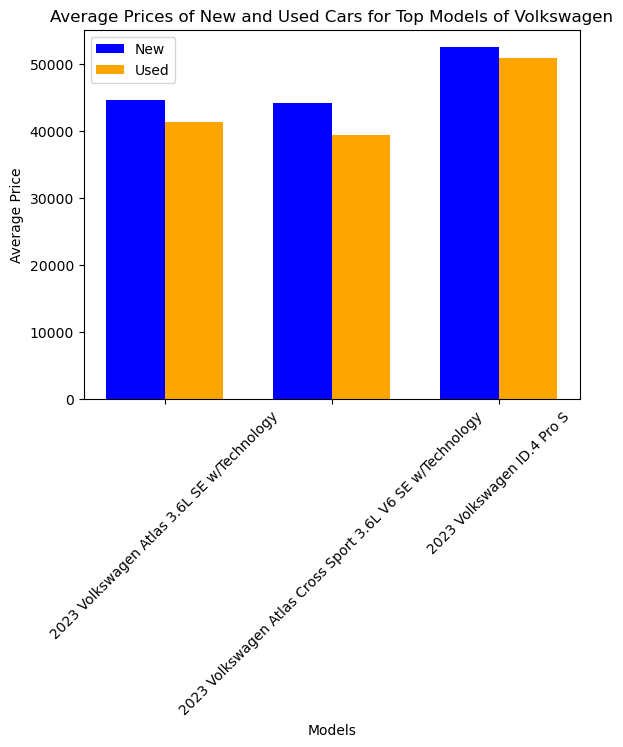

In [88]:
brand = 'Volkswagen'
top_3_models = ['2023 Volkswagen Atlas 3.6L SE w/Technology', '2023 Volkswagen Atlas Cross Sport 3.6L V6 SE w/Technology', '2023 Volkswagen ID.4 Pro S']
volkswagen_df = volkswagen_df[volkswagen_df['Model'].isin(top_3_models)]

avg_prices = volkswagen_df.groupby(['Model', 'Status'])['Price'].mean().unstack()

bar_width = 0.35
x = np.arange(len(avg_prices))

fig, ax = plt.subplots()

rects1 = ax.bar(x - bar_width/2, avg_prices['New'], bar_width, label='New', color='blue')
rects2 = ax.bar(x + bar_width/2, avg_prices['Used'], bar_width, label='Used', color='orange')

ax.set_xlabel('Models')
ax.set_ylabel('Average Price')
ax.set_title('Average Prices of New and Used Cars for Top Models of Volkswagen')
ax.set_xticks(x)
ax.set_xticklabels(avg_prices.index)
plt.xticks(rotation=45)
ax.legend()

# Show plot
plt.show()

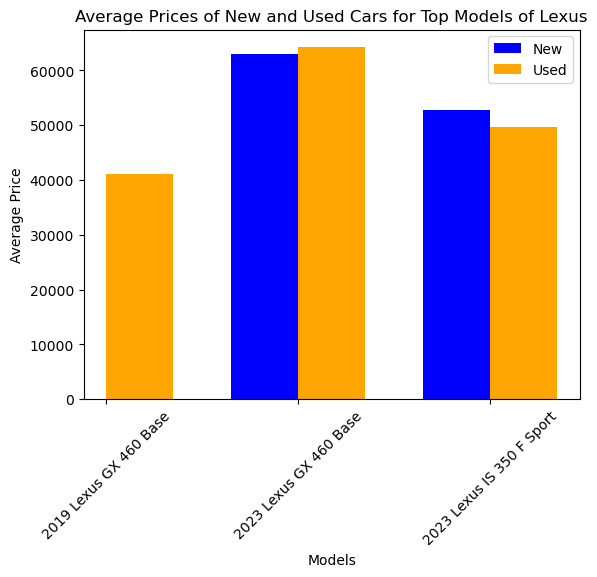

In [89]:
brand = 'Lexus'
top_3_models = ['2023 Lexus GX 460 Base', '2023 Lexus IS 350 F Sport', '2019 Lexus GX 460 Base']
lexus_df = lexus_df[lexus_df['Model'].isin(top_3_models)]

avg_prices = lexus_df.groupby(['Model', 'Status'])['Price'].mean().unstack()

bar_width = 0.35
x = np.arange(len(avg_prices))

fig, ax = plt.subplots()

rects1 = ax.bar(x - bar_width/2, avg_prices['New'], bar_width, label='New', color='blue')
rects2 = ax.bar(x + bar_width/2, avg_prices['Used'], bar_width, label='Used', color='orange')

ax.set_xlabel('Models')
ax.set_ylabel('Average Price')
ax.set_title('Average Prices of New and Used Cars for Top Models of Lexus')
ax.set_xticks(x)
ax.set_xticklabels(avg_prices.index)
plt.xticks(rotation=45)
ax.legend()

# Show plot
plt.show()

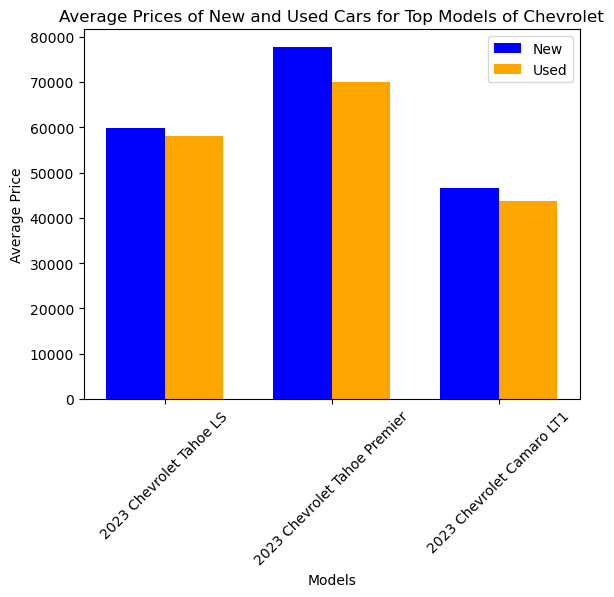

In [90]:
brand = 'Chevrolet'
models = ['2023 Chevrolet Tahoe LS', '2023 Chevrolet Tahoe Premier', '2023 Chevrolet Camaro LT1']
avg_prices = chevrolet_df.groupby(['Model', 'Status'])['Price'].mean().unstack()

avg_prices = avg_prices.loc[models]

bar_width = 0.35
x = np.arange(len(avg_prices))

fig, ax = plt.subplots()

rects1 = ax.bar(x - bar_width/2, avg_prices['New'], bar_width, label='New', color='blue')
rects2 = ax.bar(x + bar_width/2, avg_prices['Used'], bar_width, label='Used', color='orange')

ax.set_xlabel('Models')
ax.set_ylabel('Average Price')
ax.set_title('Average Prices of New and Used Cars for Top Models of Chevrolet')
ax.set_xticks(x)
ax.set_xticklabels(models)
plt.xticks(rotation=45)
ax.legend()

# Show plot
plt.show()

In [91]:
new_prices = completed_set.loc[completed_set['Status'] == 'New', 'Price'].values
used_prices = completed_set.loc[completed_set['Status'] == 'Used', 'Price'].values
print(new_prices)

[49445. 50895. 57745. ... 47346. 30895. 52585.]


In [92]:
print(used_prices)

[40990. 48844. 34452. ... 22000.  9994. 10995.]


In [93]:
new_prices_cleaned = [price for price in new_prices if not np.isnan(price)]
used_prices_cleaned = [price for price in used_prices if not np.isnan(price)]

In [94]:
t_statistic, p_value = stats.ttest_ind(new_prices_cleaned, used_prices_cleaned)

print("t-statistic:", t_statistic)

t-statistic: 109.85328461410134


In [95]:
confidence_level = 0.95

n1 = len(new_prices_cleaned)
n2 = len(used_prices_cleaned)
degrees_of_freedom = n1 + n2 - 2

alpha = 1 - confidence_level
critical_value = stats.t.ppf(1 - alpha / 2, degrees_of_freedom)

print("Critical t-value:", critical_value)

Critical t-value: 1.9599858542715154


In [96]:
vw_new_prices = vw_df.loc[vw_df['Status'] == 'New', 'Price'].values
vw_used_prices = vw_df.loc[vw_df['Status'] == 'Used', 'Price'].values
lexus_new_prices = lexus_df.loc[lexus_df['Status'] == 'New', 'Price'].values
lexus_used_prices = lexus_df.loc[lexus_df['Status'] == 'Used', 'Price'].values
chevrolet_new_prices = chevrolet_df.loc[chevrolet_df['Status'] == 'New', 'Price'].values
chevrolet_used_prices = chevrolet_df.loc[chevrolet_df['Status'] == 'Used', 'Price'].values

In [97]:
vw_new_prices_cleaned = [price for price in vw_new_prices if not np.isnan(price)]
vw_used_prices_cleaned = [price for price in vw_used_prices if not np.isnan(price)]
lexus_new_prices_cleaned = [price for price in lexus_new_prices if not np.isnan(price)]
lexus_used_prices_cleaned = [price for price in lexus_used_prices if not np.isnan(price)]
chevrolet_new_prices_cleaned = [price for price in chevrolet_new_prices if not np.isnan(price)]
chevrolet_used_prices_cleaned = [price for price in chevrolet_used_prices if not np.isnan(price)]

In [98]:
vw_t_statistic, vw_p_value = stats.ttest_ind(vw_new_prices_cleaned, vw_used_prices_cleaned)

print("t-statistic:", vw_t_statistic)

t-statistic: 89.96707894642257


In [99]:
confidence_level = 0.95

n1 = len(vw_new_prices_cleaned)
n2 = len(vw_used_prices_cleaned)
degrees_of_freedom = n1 + n2 - 2

alpha = 1 - confidence_level
vw_critical_value = stats.t.ppf(1 - alpha / 2, degrees_of_freedom)

print("Critical t-value:", vw_critical_value)

Critical t-value: 1.9602239933702907


In [100]:
t_statistic, p_value = stats.ttest_ind(lexus_new_prices_cleaned, lexus_used_prices_cleaned)

print("t-statistic:", t_statistic)

t-statistic: 26.683959683983364


In [101]:
confidence_level = 0.95

n1 = len(lexus_new_prices_cleaned)
n2 = len(lexus_used_prices_cleaned)
degrees_of_freedom = n1 + n2 - 2

alpha = 1 - confidence_level
lexus_critical_value = stats.t.ppf(1 - alpha / 2, degrees_of_freedom)

print("Critical t-value:", lexus_critical_value)

Critical t-value: 1.9647875279653393


In [102]:
t_statistic, p_value = stats.ttest_ind(chevrolet_new_prices_cleaned, chevrolet_used_prices_cleaned)

print("t-statistic:", t_statistic)

t-statistic: 43.77354187773141


In [103]:
confidence_level = 0.95

n1 = len(chevrolet_new_prices_cleaned)
n2 = len(chevrolet_used_prices_cleaned)
degrees_of_freedom = n1 + n2 - 2

alpha = 1 - confidence_level
chevrolet_critical_value = stats.t.ppf(1 - alpha / 2, degrees_of_freedom)

print("Critical t-value:", chevrolet_critical_value)

Critical t-value: 1.9602107411505107
